In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from gpnotebook.tools.standard_imports import *

In [2]:
from gpnotebook.tools.profile import landscape_glycoproteins

In [3]:
df = landscape_glycoproteins()

/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/brca/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ccrcc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/coad/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/gbm/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/hnscc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/lscc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/luad/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ov/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/pdac/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ucec/glycoproteomics_abundance.joblib


In [4]:
df

,BRCA,CCRCC,COAD,GBM,HNSCC,LSCC,LUAD,OV,PDAC,UCEC
F13B|ENSG00000143278.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
SENP7|ENSG00000138468.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
ATG10|ENSG00000152348.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NGFR|ENSG00000064300.9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
LAMA1|ENSG00000101680.15,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
PEMT|ENSG00000133027.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
EML4|ENSG00000143924.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ULBP2|ENSG00000131015.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MYH15|ENSG00000144821.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
df2 = df[df.sum(axis=1)>0.5 * df.shape[1]]

In [6]:
df2.head(2)

,BRCA,CCRCC,COAD,GBM,HNSCC,LSCC,LUAD,OV,PDAC,UCEC
F13B|ENSG00000143278.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
SENP7|ENSG00000138468.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [7]:
genes = set([i.split('|')[0] for i in df2.index])

In [8]:
import gseapy
enr = gseapy.enrichr(gene_list=list(genes),
                        #  background=len(total_genes),
                         gene_sets=['KEGG_2021_Human'],
                         organism='human',
                         outdir= None
                         )
enrich_df = enr.res2d
enrich_df['-Log10(Adj.P)'] = [-1 * np.log10(i) for i in enrich_df['Adjusted P-value']]
enrich_df = enrich_df.sort_values('-Log10(Adj.P)', ascending=False)
enrich_df = enrich_df.head(10)


In [9]:
enrich_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-Log10(Adj.P)
0,KEGG_2021_Human,Complement and coagulation cascades,54/85,1.605796e-52,4.207186e-50,0,0,41.138961,4906.265593,ITGAM;SERPINA1;ITGB2;C4BPA;PLAT;C4BPB;C8B;C8A;...,49.376008
1,KEGG_2021_Human,ECM-receptor interaction,52/88,3.301191e-48,4.324560e-46,0,0,34.020140,3719.415116,ITGB1;ITGB5;ITGB4;ITGB3;TNC;LAMC2;LAMC1;COMP;T...,45.364058
2,KEGG_2021_Human,Cell adhesion molecules,56/148,4.327014e-38,3.778926e-36,0,0,14.365067,1235.874880,ITGB1;CD40;CNTNAP1;ITGAM;CD80;ITGB2;ICAM2;ICAM...,35.422632
3,KEGG_2021_Human,Lysosome,47/128,1.920299e-31,1.257796e-29,0,0,13.550472,958.393137,SCARB2;CD63;ASAH1;HEXB;CTSZ;HEXA;GBA;LIPA;GNS;...,28.900390
4,KEGG_2021_Human,Focal adhesion,49/201,1.361392e-23,7.133696e-22,0,0,7.518630,395.862984,ITGB1;FLT1;ITGB5;ITGB4;ITGB3;TNC;LAMC2;LAMC1;I...,21.146685
5,KEGG_2021_Human,Hematopoietic cell lineage,34/99,5.442819e-22,2.376698e-20,0,0,12.033924,589.211910,CSF1R;ITGAM;TFRC;ITGB3;CD3D;HLA-DMB;ANPEP;CD38...,19.624026
6,KEGG_2021_Human,Phagosome,41/152,9.967790e-22,3.730802e-20,0,0,8.549418,413.428595,ITGB1;COLEC12;ITGAM;TFRC;ITGB5;C1R;ITGB3;ITGB2...,19.428198
7,KEGG_2021_Human,PI3K-Akt signaling pathway,58/354,1.269668e-18,4.158163e-17,0,0,4.586109,188.983344,ITGB1;YWHAE;FLT1;ITGB5;ITGB4;ITGB3;TNC;LAMC2;L...,16.381099
8,KEGG_2021_Human,Human papillomavirus infection,53/331,1.123319e-16,3.270107e-15,0,0,4.438791,163.014933,ITGB1;ITGB5;ITGB4;ITGB3;TNC;LAMC2;LAMC1;COMP;T...,14.485438
9,KEGG_2021_Human,Hypertrophic cardiomyopathy,27/90,4.832598e-16,1.266141e-14,0,0,9.778195,344.837620,ITGB1;ITGB5;LAMA2;ITGB4;LAMA1;ITGB3;SGCD;SGCB;...,13.897518


In [10]:
from gpnotebook.tools.visualization import plot_enrichr

HELLO


/Users/yingweihu/Documents/GitHub/GPNotebook/gpnotebook/tools/visualization.py:162: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  n = 0


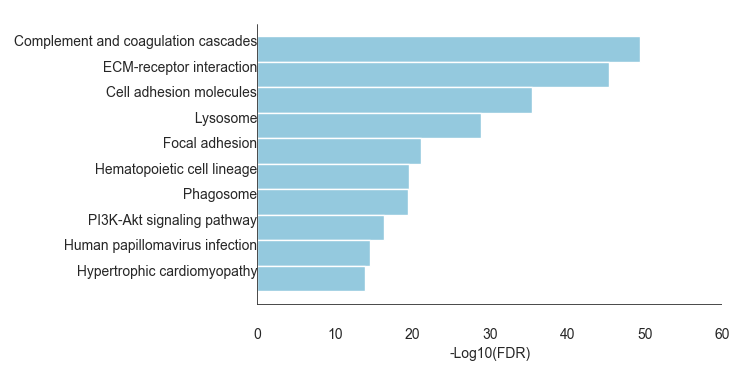

In [13]:
plot_enrichr(enrich_df,title='',max_x=60,min_x=0)